# 【ML Project】Bank Telemarketing Analysis

## Predicting customer response to telemarketing capmpaign

## 1. Project background

Nowadays, marketing spending in banking industry is massive, meaning that it is essential for banks to optimize markeing strategies and improve effectiveness. Understanding customer needs leads to more effective marketing plans, smarter product design and great customer satisfaction. 

### Main objective: Increase effectiveness of the bank's telemarketing campaign

The project will enable bank to develop a more granular understanding of it's customer base, predict customer respose to its market campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, bank will be able to predict customer saving behaviourand identify which type of customers are more likely to make term deposits. The bank can then focus on marketting effort on those customers. This will not only allow the bank to secure deposits effectively but also increase customer satisfaction by reducing undesirable advertisement for certain customers.

## 2. Data Cleaning

### Load raw data

The dataset is about direct phone call marketting campaign, which aim to promote term deposit within existing customers, by a Portuguese banking institution from May 2008 to November 2010. it's publicly available in UCI machine learning repository. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
dataset1 = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Bank Tele Marketing\\bank-full.csv', sep=';')
dataset1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


There are  45211 observation in dataset, each represents an existing customer that bank reached via phone calls.

For each observation dataset records 16 input variables that stands for qualitative and quantitative attributes of customer such as age, job, personal loan status, account balance and number of contacts.

There is single binary output variable that denotes Yes or No revealing the outcomes of phone calls.

### Clean the dataset



#### 2.1 Dealing with missing data

There is no missing values in dataset. Nevertheless, there are values like "unknown", "others" which are helpless just like missing values, thus these ambiguous values are removed from dataset.

In [3]:
# Step 1 Delete the rows which column 'poutcome' contains 'other'

condition = dataset1.poutcome == 'other'
condition

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210     True
Name: poutcome, Length: 45211, dtype: bool

In [4]:
dataset2 = dataset1.drop(dataset1[condition].index, axis=0, inplace=False)
dataset2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [5]:
# Step 2: Replace unknown in job and education with other

dataset2[['job', 'education']] = dataset2[['job', 'education']].replace(['unknown'], 'other')
dataset2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


### 2.2 Drop outlier in column balance

In order to capture general trend in data, outliers in column balance will be dropped. outliers are defined as values which are three standard deviation away from mean. In sum, 2556 row of data were removed.

In [6]:
from scipy.stats import zscore



In [7]:
dataset2.balance.mean()

1356.9630628761154

In [8]:
dataset2['balance_outlier'] = dataset2['balance']

In [9]:
dataset2['balance_outlier'] = zscore(dataset2['balance_outlier'])

In [10]:
dataset2.balance_outlier

0        0.259339
1       -0.438138
2       -0.447047
3        0.049172
4       -0.447377
           ...   
45205   -0.281090
45206   -0.175512
45207    0.122747
45208    1.437859
45209   -0.227311
Name: balance_outlier, Length: 43371, dtype: float64

In [11]:
condition1 = (dataset2['balance_outlier'] > 3) | (dataset2['balance_outlier'] < -3)
condition1

0        False
1        False
2        False
3        False
4        False
         ...  
45205    False
45206    False
45207    False
45208    False
45209    False
Name: balance_outlier, Length: 43371, dtype: bool

In [12]:
dataset3 = dataset2.drop(dataset2[condition1].index, axis=0, inplace=False)
dataset3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_outlier
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.259339
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,-0.438138
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,-0.447047
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.049172
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,-0.447377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,-0.281090
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,-0.175512
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0.122747
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1.437859


In [13]:
dataset4 = dataset3.drop('balance_outlier', axis=1)

In [14]:
dataset4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


#### 2.3 Creating and transforming data

Some changes are made to the column name and data types for easier analysis.

In [15]:
type(dataset4.index)

pandas.core.indexes.numeric.Int64Index

In [16]:
# Step 1: Change the column name y to response

dataset4.rename(index=str, columns={'y':'response'}, inplace=True)

In [17]:
dataset4



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [18]:
def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x:0 if x=='no' else 1)
    return dataset4[new_column].value_counts()

In [19]:
convert(dataset4, 'response_binary', 'response')

0    37785
1     4870
Name: response_binary, dtype: int64

In [20]:
# Step 2: drop column contact which is useless

dataset5 = dataset4.drop('contact', axis=1)
dataset5

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,other,no,1506,yes,no,5,may,92,1,-1,0,unknown,no,0
4,33,other,single,other,no,1,no,no,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,386,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes,1


In [21]:
# Step 3: Change unit of duration to minutes from seconds

dataset5.duration = dataset5.duration.apply(lambda n:n/60).round(2)
dataset5


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,47,blue-collar,married,other,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0
4,33,other,single,other,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [22]:
# Step 4: Change month from words to numbers for easier analysis

dataset5['month_int'] = dataset5['month'].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})
dataset5

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5
3,47,blue-collar,married,other,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0,5
4,33,other,single,other,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11


In [23]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42655 entries, 0 to 45209
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              42655 non-null  int64  
 1   job              42655 non-null  object 
 2   marital          42655 non-null  object 
 3   education        42655 non-null  object 
 4   default          42655 non-null  object 
 5   balance          42655 non-null  int64  
 6   housing          42655 non-null  object 
 7   loan             42655 non-null  object 
 8   day              42655 non-null  int64  
 9   month            42655 non-null  object 
 10  duration         42655 non-null  float64
 11  campaign         42655 non-null  int64  
 12  pdays            42655 non-null  int64  
 13  previous         42655 non-null  int64  
 14  poutcome         42655 non-null  object 
 15  response         42655 non-null  object 
 16  response_binary  42655 non-null  int64  
 17  month_int        

#### 2.4 Filtering

In [24]:
# Step 1: data rows with duration < 5 seconds

condition2 = (dataset5.duration < (5/60))
condition2

0        False
1        False
2        False
3        False
4        False
         ...  
45205    False
45206    False
45207    False
45208    False
45209    False
Name: duration, Length: 42655, dtype: bool

In [25]:
dataset6 = dataset5.drop(dataset5[condition2].index, axis=0, inplace=False)
dataset6

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5
3,47,blue-collar,married,other,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0,5
4,33,other,single,other,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11


In [26]:
# Drop customer values with other education

condition3 = (dataset6.education == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis=0, inplace=False)
dataset7

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,5
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1,11
45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1,11
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1,11
45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1,11


# Part 3. Exploratory Data Analysis


To obtain better understanding of dataset, the distribution of key variables and relationship among them were plotted.

#### 3.1 Visualize distribution of age and balance

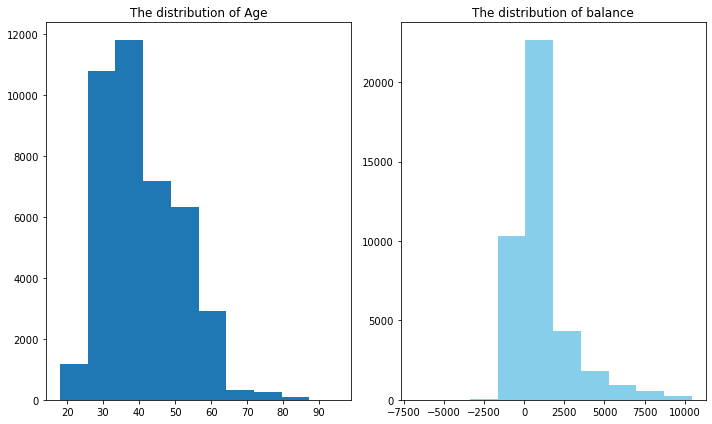

In [27]:
dist_age_balance = plt.figure(figsize=(10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)

ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7.age)

ra1.set_title('The distribution of Age')

ra2.hist(dataset7.balance, color='skyblue')

ra2.set_title('The distribution of balance')

plt.tight_layout()

plt.show()

#### The distribution of age

In it telemarketing campaign, clients call by bank have an extensive range, from 18 to 95 years old. However a majority of customers called are is in range of 30s and 40s (33 to 38 years old falls within the 25th to 75th percentiles ). The distribution of age is fairly normal with a small standard deviation.


#### The distribution of balance

After dropping outliers in balance, the range of balance is still massive from a minimum of -6847 to a maximum of 10443 euros, giving a range of 17290 euros. The distribution of balance has huge standard deviation relative to mean , suggesting large variability in customer balance.



#### 3.2 Visualize relationship between age and balance

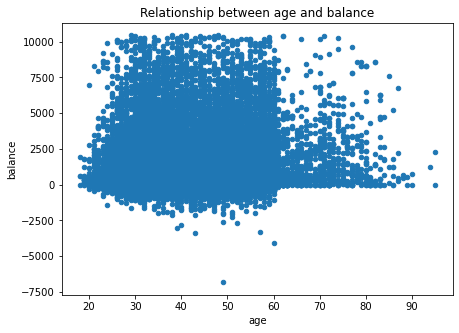

In [28]:
scatter_age_balance = dataset7.plot.scatter('age', 'balance', figsize=(7,5))

plt.title('Relationship between age and balance')

plt.show()

Based on this scatter plot there is no clear relationship between age and balance. 

Neverthless, over age of 60, clients tends to have a significantly lower balance. mostly under 5000 euros. This is due the fact that most peope retire after 60 and there is no reliable source of income.

#### 3.3 Visualize distrubution of duration & campaign

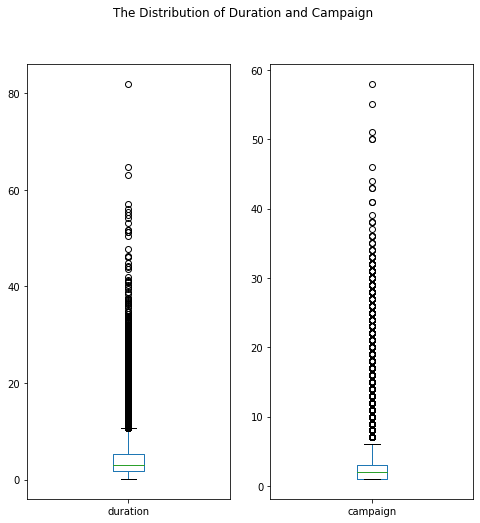

In [29]:
dist_dur_camp = dataset7[['duration', 'campaign']].plot(kind='box', figsize=(8,8), subplots=True, layout=(1,2), sharex=False, sharey=False, title='The Distribution of Duration and Campaign')
plt.show()

In [30]:
dataset7['duration'].describe()

count    40841.000000
mean         4.308949
std          4.305823
min          0.100000
25%          1.730000
50%          3.000000
75%          5.300000
max         81.970000
Name: duration, dtype: float64

In [31]:
dataset7['campaign'].describe()

count    40841.000000
mean         2.774149
std          3.104177
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

#### The distrubution of duration

As observed from the box plot, the duration of contact has a median of 3 minutes with an interquantile range of 1.73 minutes to 5.3 minutes. The left skewed boxplot indicates that most calls are relatively short. Also, there are large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

#### The distribution of campaign

About the half of the clients are contacted by bank for second time, while 25% were introduced to term deposit for first time, Most of the client were contacted by bank one to three times, which is reasonable. However some clients have been contacted by as high as 58 times, which is normal, these clients may have some spacial needs which requires frequent contact.

#### Visualize relationship between duration and campaign with response

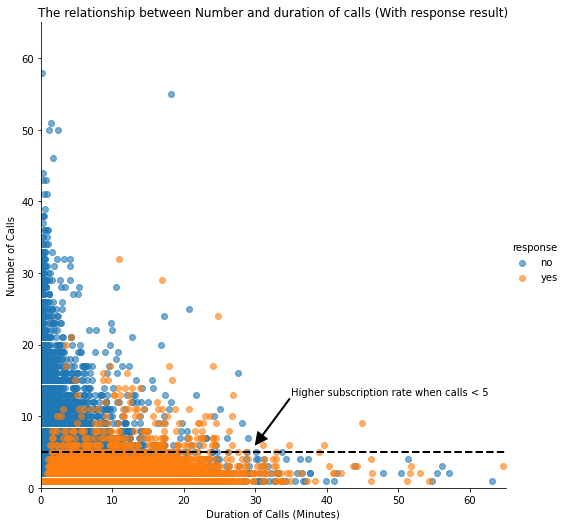

In [32]:
import seaborn as sns

dur_cam = sns.lmplot(x='duration', y='campaign', data=dataset7, hue='response', fit_reg=False, scatter_kws={'alpha':0.6}, height=7)

plt.axis([0,65,0,65])

plt.ylabel('Number of Calls')

plt.xlabel('Duration of Calls (Minutes)')

plt.title('The relationship between Number and duration of calls (With response result)')

# Annotation

plt.axhline(y=5, linewidth=2, color='k', linestyle='--')

plt.annotate('Higher subscription rate when calls < 5', xytext=(35,13), arrowprops=dict(color='k', width=1), xy=(30,6))

plt.show()

In this scatter plot , clients subscribed to term deposit are denoted as yes, while those who did not are denoted as no.

As we can see from plot, yes clients and no clients are forming two separate clusters. compared to no clients yes clients were contacted fewer times and had longer call duration. Most importantly, after 5 campaign calls, clients are most likely to reject term deposit unless the duration is high. Most yes clients were approached by bank less than 10 times.

This suggest that a bank should avoid calling a client for more than 5 times, which can be disturbing and increase dissatisfaction.

#### 3.5 Scatter matrix and correlation matrix

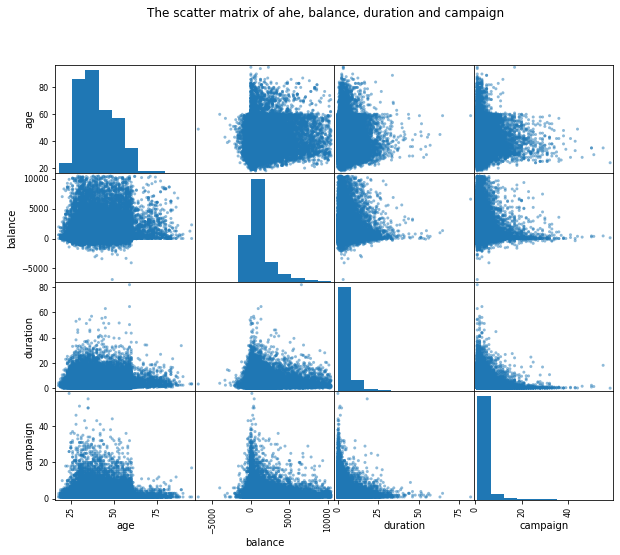

In [33]:
from pandas.plotting import scatter_matrix

matrix = scatter_matrix(dataset7[['age', 'balance', 'duration', 'campaign']], figsize=(10,8))

plt.suptitle('The scatter matrix of ahe, balance, duration and campaign')

plt.show()

In [34]:
corr_data = dataset7[['age', 'balance', 'duration', 'campaign', 'month_int', 'previous', 'response_binary']]

corr = corr_data.corr()

corr

,age,balance,duration,campaign,month_int,previous,response_binary
age,1.000000,0.103405,-0.007422,0.003563,0.093111,0.012862,0.023204
balance,0.103405,1.000000,0.035481,-0.026482,0.095386,0.036765,0.069456
duration,-0.007422,0.035481,1.000000,-0.081852,-0.018190,0.004824,0.400681
campaign,0.003563,-0.026482,-0.081852,1.000000,0.061614,-0.051522,-0.072495
month_int,0.093111,0.095386,-0.018190,0.061614,1.000000,-0.024635,0.011695
previous,0.012862,0.036765,0.004824,-0.051522,-0.024635,1.000000,0.128274
response_binary,0.023204,0.069456,0.400681,-0.072495,0.011695,0.128274,1.000000


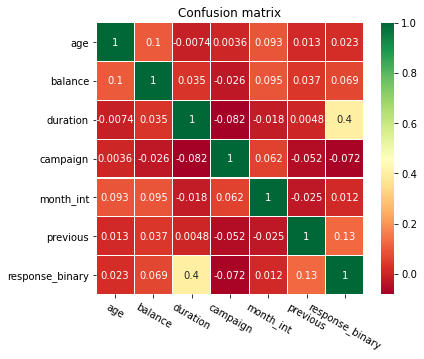

In [35]:
corr_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws=({'size':10}))

fig = plt.gcf()

fig.set_size_inches(6,5)

plt.xticks(fontsize=10, rotation=-30)

plt.yticks(fontsize=10)

plt.title('Confusion matrix')

plt.show()

The scatter matrix does not reveal any clear relationship among age, balance, duration and capaign.

To investigate more about correlation , a correlation matrix was plotted with all qualitative variables. clearly campaign outcome has strong correlation with duration, a moderate correlation with previous , and mild correlation between balance, "month of contact" and number of campaign. Their influences on campaign outcome will be further explored in machine learning part.

# 4. Data visualization

With a sound knowledge of diatribution of key variables, further analysis of each customer charecteristics can be carried out to investigate its influence on the subscription rate.

#### 4.1 Visualize the subsription and contact rate by age

In [36]:
lst = [dataset7]
lst

[       age           job   marital  education default  balance housing loan  \
 0       58    management   married   tertiary      no     2143     yes   no   
 1       44    technician    single  secondary      no       29     yes   no   
 2       33  entrepreneur   married  secondary      no        2     yes  yes   
 5       35    management   married   tertiary      no      231     yes   no   
 6       28    management    single   tertiary      no      447     yes  yes   
 ...    ...           ...       ...        ...     ...      ...     ...  ...   
 45205   25    technician    single  secondary      no      505      no  yes   
 45206   51    technician   married   tertiary      no      825      no   no   
 45207   71       retired  divorced    primary      no     1729      no   no   
 45208   72       retired   married  secondary      no     5715      no   no   
 45209   57   blue-collar   married  secondary      no      668      no   no   
 
        day month  duration  campaign 

In [37]:
def age_grp_map(age):
    
    if (age < 30):
        ret = 20
    elif (age >= 30 and age <= 39):
        ret = 30
    elif (age >= 40 and age <= 49):
        ret = 40
    elif (age >= 50 and age <= 59):
        ret = 50
    elif (age >= 60):
        ret = 60
    else:
        ret = age
    return ret
        
        

In [38]:
dataset7['age_group'] = dataset7['age'].apply(age_grp_map)

In [39]:
dataset7[['age', 'age_group']]

,age,age_group
0,58,50
1,44,40
2,33,30
5,35,30
6,28,20
...,...,...
45205,25,20
45206,51,50
45207,71,60
45208,72,60


In [40]:
count_age_response_pct = pd.crosstab(dataset7['response'], dataset7['age_group']).apply(lambda x:x/x.sum()*100)
count_age_response_pct

age_group,20,30,40,50,60
response,,,,,
no,83.013699,89.635398,91.175912,90.817141,66.599462
yes,16.986301,10.364602,8.824088,9.182859,33.400538


In [41]:
count_age_response_pct = count_age_response_pct.transpose()

In [42]:
count_age_response_pct

response,no,yes
age_group,,
20,83.013699,16.986301
30,89.635398,10.364602
40,91.175912,8.824088
50,90.817141,9.182859
60,66.599462,33.400538


In [43]:
age = pd.DataFrame(dataset7['age_group'].value_counts())
age

,age_group
30,16566
40,10528
50,7514
20,4745
60,1488


In [44]:
age['% Contacted'] = (age['age_group'] / age['age_group'].sum()) * 100
age

,age_group,% Contacted
30,16566,40.562180
40,10528,25.778017
50,7514,18.398178
20,4745,11.618227
60,1488,3.643398


In [45]:
count_age_response_pct

response,no,yes
age_group,,
20,83.013699,16.986301
30,89.635398,10.364602
40,91.175912,8.824088
50,90.817141,9.182859
60,66.599462,33.400538


In [46]:
age['% Subscription'] = count_age_response_pct['yes']
age

,age_group,% Contacted,% Subscription
30,16566,40.562180,10.364602
40,10528,25.778017,8.824088
50,7514,18.398178,9.182859
20,4745,11.618227,16.986301
60,1488,3.643398,33.400538


In [47]:
age['age'] = age.index
age

,age_group,% Contacted,% Subscription,age
30,16566,40.562180,10.364602,30
40,10528,25.778017,8.824088,40
50,7514,18.398178,9.182859,50
20,4745,11.618227,16.986301,20
60,1488,3.643398,33.400538,60


In [48]:
age = age.sort_values('age', ascending=True).drop('age_group', axis=1)
age

,% Contacted,% Subscription,age
20,11.618227,16.986301,20
30,40.562180,10.364602,30
40,25.778017,8.824088,40
50,18.398178,9.182859,50
60,3.643398,33.400538,60


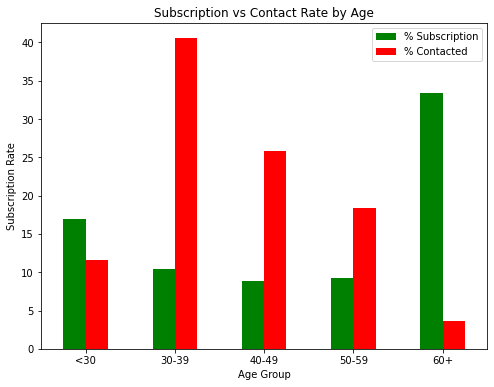

In [49]:
plot_age = age[['% Subscription', '% Contacted']].plot(kind='bar', figsize=(8,6), color=('green', 'red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Subscription vs Contact Rate by Age')
plt.show()

#### Insights: target the youngest and oldest instead of middle aged

Green vertical bars indicates that the client with 60+ age has highest subscription rate. About 17% of subscription came from clients aged between 18 to 29. More than 50% of subscription come from youngest and eldest clients.

It's not surpsising to see such pattern because the main investment objective of older people is saving for retirement while middle aged group tends to be more aggresive with a main objective of generating high investment income. Term deposits as the least risky investment tool, are more preferable for eldest.

The youngest may not have enough money or professional knowledge in shophisticated investments, such as stock market and mutual funds. Term deposits provide liquidity and generates intesrest income which are higher than the regular saving accounts so term deposits are ideal investment for students.

However, red verticle bar says that bank focused it's marketing effort on middle aged group which retuned lower subscription rate than younger and older groups. Thus, to make marketting campaign more effective bank should target youngest and oldest groups in future.



#### 4.2 Visualize Subscription rate by balance lavel

In [50]:
def get_balance_grp(balance):
    if balance <= 0:
        ret = 'no balance'
    elif balance > 0 and balance <= 1000:
        ret = 'low balance'
    elif balance > 1000 and balance <= 5000:
        ret = 'average balance'
    elif balance > 5000:
        ret = 'high balance'
    return ret

In [51]:
dataset7['balance_group'] = dataset7['balance'].apply(get_balance_grp)
dataset7['balance_group'].unique()

array(['average balance', 'low balance', 'no balance', 'high balance'],
      dtype=object)

In [52]:
count_balance_response_pct = pd.crosstab(dataset7['response'], dataset7['balance_group']).apply(lambda x:x/x.sum()*100).transpose()

In [53]:
count_balance_response_pct

response,no,yes
balance_group,,
average balance,85.237209,14.762791
high balance,85.080856,14.919144
low balance,89.265352,10.734648
no balance,93.078512,6.921488


In [54]:
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal

,balance_group
low balance,21398
average balance,10750
no balance,6776
high balance,1917


In [55]:
bal['% Contacted'] = (bal['balance_group'] / bal['balance_group'].sum()) * 100
bal

,balance_group,% Contacted
low balance,21398,52.393428
average balance,10750,26.321589
no balance,6776,16.591171
high balance,1917,4.693813


In [56]:
bal

,balance_group,% Contacted
low balance,21398,52.393428
average balance,10750,26.321589
no balance,6776,16.591171
high balance,1917,4.693813


In [57]:
count_balance_response_pct

response,no,yes
balance_group,,
average balance,85.237209,14.762791
high balance,85.080856,14.919144
low balance,89.265352,10.734648
no balance,93.078512,6.921488


In [58]:
bal['% Subscription'] = count_balance_response_pct['yes']
bal

,balance_group,% Contacted,% Subscription
low balance,21398,52.393428,10.734648
average balance,10750,26.321589,14.762791
no balance,6776,16.591171,6.921488
high balance,1917,4.693813,14.919144


In [59]:
bal.drop('balance_group', axis=1, inplace=True)
bal

,% Contacted,% Subscription
low balance,52.393428,10.734648
average balance,26.321589,14.762791
no balance,16.591171,6.921488
high balance,4.693813,14.919144


In [60]:
bal['bal'] = [1,2,0,3]
bal

,% Contacted,% Subscription,bal
low balance,52.393428,10.734648,1
average balance,26.321589,14.762791,2
no balance,16.591171,6.921488,0
high balance,4.693813,14.919144,3


In [61]:
bal = bal.sort_values('bal', ascending=True)
bal

,% Contacted,% Subscription,bal
no balance,16.591171,6.921488,0
low balance,52.393428,10.734648,1
average balance,26.321589,14.762791,2
high balance,4.693813,14.919144,3


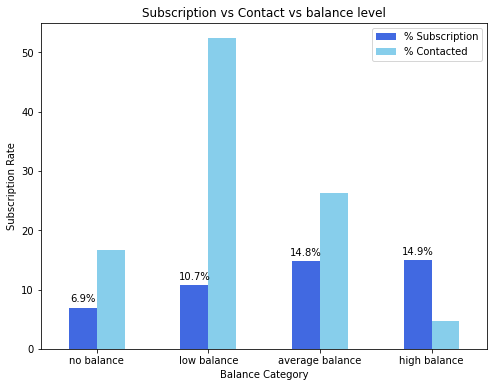

In [62]:
plot_balance = bal[['% Subscription', '% Contacted']].plot(kind='bar', color=('royalblue', 'skyblue'), figsize=(8,6))

plt.title('Subscription vs Contact vs balance level')

plt.ylabel('Subscription Rate')

plt.xlabel('Balance Category')

plt.xticks(rotation='horizontal')

# label the bar

for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width() / 2, rec.get_height()+1, label+'%', ha='center', color='black')
    

plt.show()

#### Insights: target clients with average or high balance

To identify the trend more easily, clients are categorized into four groups based on their level of balance:

No balance: Clients with -ve balance

Low balance: Clients with balance between 0 and 1000

Average balance: Clients with balance between 1000 and 5000

High balance: Clients with balance greater than 5000

Unsurprisingly, the bar chart indicates a +ve correlation between client balance level and subscription rate.

Clients with -ve balances only returned a subscription rate of 6.9%, while clients with average or high balance had higher subscription rate, nearly 15%.

However, in the campaign, more than 50% of clients contacted only have a low balance level. In the future bank should focus their marketting focus to high balance customers to secure more term deposits. 

### 4.3 Visualize suubscription rate by age and balance

In [63]:
age_balance1 = pd.DataFrame(dataset7.groupby(['age_group', 'balance_group'])['response_binary'].sum())
age_balance1

response_binary
age_group balance_group                   
20        average balance              215
          high balance                  29
          low balance                  488
          no balance                    74
30        average balance              550
          high balance                  93
          low balance                  910
          no balance                   164
40        average balance              335
          high balance                  57
          low balance                  419
          no balance                   118
50        average balance              265
          high balance                  66
          low balance                  279
          no balance                    80
60        average balance              222
          high balance                  41
          low balance                  201
          no balance                    33

In [64]:
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group', 'balance_group'])['response'].count())
age_balance2

response
age_group balance_group            
20        average balance       981
          high balance          147
          low balance          2903
          no balance            714
30        average balance      4061
          high balance          691
          low balance          9038
          no balance           2776
40        average balance      2830
          high balance          486
          low balance          5298
          no balance           1914
50        average balance      2268
          high balance          474
          low balance          3562
          no balance           1210
60        average balance       610
          high balance          119
          low balance           597
          no balance            162

In [65]:
age_balance1['response'] = age_balance2['response']
age_balance1

response_binary  response
age_group balance_group                             
20        average balance              215       981
          high balance                  29       147
          low balance                  488      2903
          no balance                    74       714
30        average balance              550      4061
          high balance                  93       691
          low balance                  910      9038
          no balance                   164      2776
40        average balance              335      2830
          high balance                  57       486
          low balance                  419      5298
          no balance                   118      1914
50        average balance              265      2268
          high balance                  66       474
          low balance                  279      3562
          no balance                    80      1210
60        average balance              222       610
          high balance                  41       119
          low balance                  201       597
          no balance                    33       162

In [66]:
age_balance1['response_rate'] = age_balance1['response_binary'] / age_balance1['response']
age_balance1

response_binary  response  response_rate
age_group balance_group                                            
20        average balance              215       981       0.219164
          high balance                  29       147       0.197279
          low balance                  488      2903       0.168102
          no balance                    74       714       0.103641
30        average balance              550      4061       0.135435
          high balance                  93       691       0.134588
          low balance                  910      9038       0.100686
          no balance                   164      2776       0.059078
40        average balance              335      2830       0.118375
          high balance                  57       486       0.117284
          low balance                  419      5298       0.079086
          no balance                   118      1914       0.061651
50        average balance              265      2268       0.116843
          high balance                  66       474       0.139241
          low balance                  279      3562       0.078327
          no balance                    80      1210       0.066116
60        average balance              222       610       0.363934
          high balance                  41       119       0.344538
          low balance                  201       597       0.336683
          no balance                    33       162       0.203704

In [67]:
age_balance1 = age_balance1.drop(['response', 'response_binary'], axis=1)
age_balance1

response_rate
age_group balance_group                 
20        average balance       0.219164
          high balance          0.197279
          low balance           0.168102
          no balance            0.103641
30        average balance       0.135435
          high balance          0.134588
          low balance           0.100686
          no balance            0.059078
40        average balance       0.118375
          high balance          0.117284
          low balance           0.079086
          no balance            0.061651
50        average balance       0.116843
          high balance          0.139241
          low balance           0.078327
          no balance            0.066116
60        average balance       0.363934
          high balance          0.344538
          low balance           0.336683
          no balance            0.203704

In [68]:
age_balance1 = age_balance1.unstack()
age_balance1

response_rate                                    
balance_group average balance high balance low balance no balance
age_group                                                        
20                   0.219164     0.197279    0.168102   0.103641
30                   0.135435     0.134588    0.100686   0.059078
40                   0.118375     0.117284    0.079086   0.061651
50                   0.116843     0.139241    0.078327   0.066116
60                   0.363934     0.344538    0.336683   0.203704

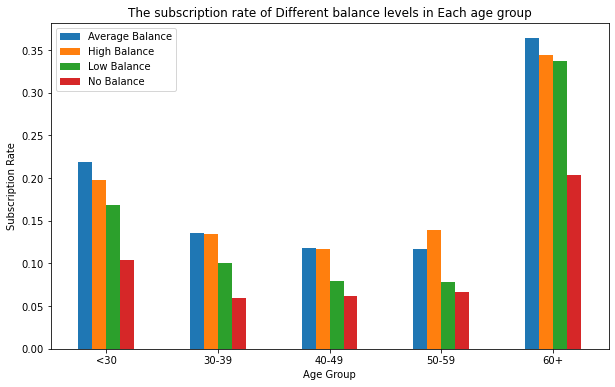

In [69]:
age_bal = age_balance1.plot(kind='bar', figsize=(10,6))

# Set x ticks

plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')

# Set legend

plt.legend(['Average Balance', 'High Balance', 'Low Balance', 'No Balance'], loc='best', ncol=1)

plt.ylabel('Subscription Rate')

plt.xlabel('Age Group')

plt.title('The subscription rate of Different balance levels in Each age group')

plt.show()

#### Insights: target older clients with high balance

While Age represents a persons life stage and balance presents person's financial condition, jointly evaluating impact of these factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates highest likelyhood of subscription.


In order to investigate combined effect of age and balance on a client's decision, we performed two layer grouping, segmenting customers according to their balance levels within each age group.

The graph tells the same story regarding subscription rate for different age group. The willingness to subscribe is exceptionally high for people aged over 60 and people aged below 30, also have a distinguishable higher subscription rate when compared to other groups.

Furthermore, the effect of balance levels on subscription decision is applicable to each individiual age group.  every age shares a common trend that the percentage of suscription increases with balance.

In sum, the bank should prioritize its telemarketing campaign to clients with age greater than 60 and have +ve balance because they have the highest acceptance rate of 35%. The next group the bank should focus on is youg clients with +ve balance who showed high subscription rate between 15 and 20%.

### 4.4 Visualize subscription rate by job

In [70]:
count_job_response_pct = pd.crosstab(dataset7.response, dataset7.job).apply(lambda x : x / x.sum() * 100).transpose()
count_job_response_pct

response,no,yes
job,,
admin.,88.034006,11.965994
blue-collar,92.765474,7.234526
entrepreneur,91.865672,8.134328
housemaid,91.209748,8.790252
management,86.865149,13.134851
other,90.506329,9.493671
retired,77.821782,22.178218
self-employed,88.773389,11.226611
services,91.265456,8.734544


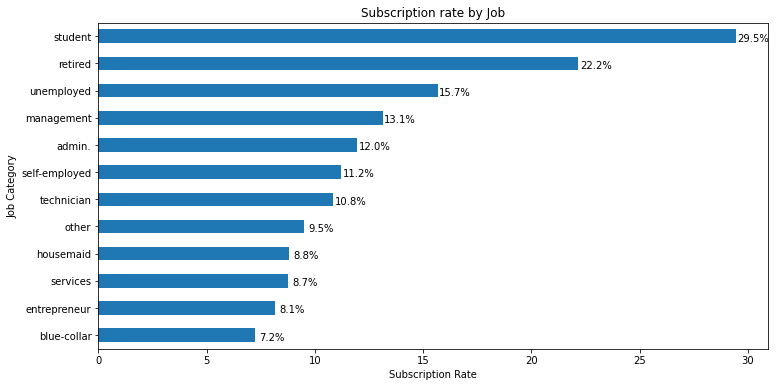

In [71]:
plot_job = count_job_response_pct['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(12,6))

plt.title('Subscription rate by Job')

plt.xlabel('Subscription Rate')

plt.ylabel('Job Category')

# label each bar

for rec, label in zip(plot_job.patches, count_job_response_pct['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y() + rec.get_height()-0.5, label+'%', ha='center', va='bottom')
    
plt.show()
    
    
    
    
    
    
    

#### Insights: target students and retired clients

As noted from horizontal bar chart students and retired clients account for more than 50% of subscription which is consistent with earlier finding of higher subscription rate among youngest and oldest age clieents.

### 4.5 Visualize subscription rate and contact by month

In [72]:
count_month_response_pct = pd.crosstab(dataset7.response, dataset7.month_int).apply(lambda x : x / x.sum() * 100).transpose()
count_month_response_pct

response,no,yes
month_int,,
1,89.687236,10.312764
2,82.728078,17.271922
3,45.700246,54.299754
4,80.387505,19.612495
5,93.389885,6.610115
6,89.903153,10.096847
7,91.533742,8.466258
8,89.552493,10.447507
9,51.203501,48.796499


In [73]:
month = pd.DataFrame(dataset7['month_int'].value_counts())
month

,month_int
5,12496
7,6520
8,5877
6,4853
11,3483
4,2529
2,2258
1,1183
10,605
9,457


In [74]:
month['% Contacted'] = 100 * month['month_int'] / month['month_int'].sum()
month

,month_int,% Contacted
5,12496,30.596704
7,6520,15.964350
8,5877,14.389951
6,4853,11.882667
11,3483,8.528195
4,2529,6.192307
2,2258,5.528758
1,1183,2.896599
10,605,1.481355
9,457,1.118974


In [75]:
month['% Subscription'] = count_month_response_pct['yes']
month

,month_int,% Contacted,% Subscription
5,12496,30.596704,6.610115
7,6520,15.964350,8.466258
8,5877,14.389951,10.447507
6,4853,11.882667,10.096847
11,3483,8.528195,10.163652
4,2529,6.192307,19.612495
2,2258,5.528758,17.271922
1,1183,2.896599,10.312764
10,605,1.481355,44.958678
9,457,1.118974,48.796499


In [76]:
month.drop('month_int', axis=1, inplace=True)
month

,% Contacted,% Subscription
5,30.596704,6.610115
7,15.964350,8.466258
8,14.389951,10.447507
6,11.882667,10.096847
11,8.528195,10.163652
4,6.192307,19.612495
2,5.528758,17.271922
1,2.896599,10.312764
10,1.481355,44.958678
9,1.118974,48.796499


In [77]:
month['Month'] = month.index
month

,% Contacted,% Subscription,Month
5,30.596704,6.610115,5
7,15.964350,8.466258,7
8,14.389951,10.447507,8
6,11.882667,10.096847,6
11,8.528195,10.163652,11
4,6.192307,19.612495,4
2,5.528758,17.271922,2
1,2.896599,10.312764,1
10,1.481355,44.958678,10
9,1.118974,48.796499,9


In [78]:
month = month.sort_values('Month', ascending=True)
month

,% Contacted,% Subscription,Month
1,2.896599,10.312764,1
2,5.528758,17.271922,2
3,0.996548,54.299754,3
4,6.192307,19.612495,4
5,30.596704,6.610115,5
6,11.882667,10.096847,6
7,15.964350,8.466258,7
8,14.389951,10.447507,8
9,1.118974,48.796499,9
10,1.481355,44.958678,10


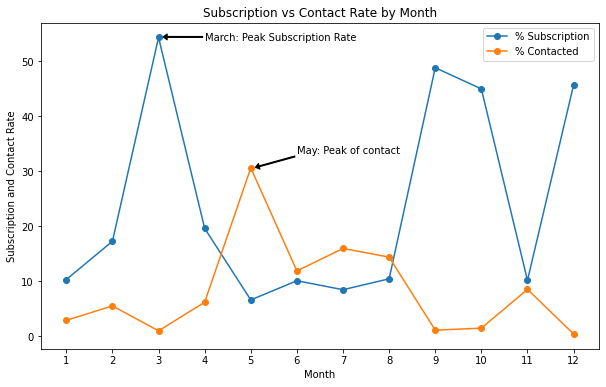

In [79]:
plot_month = month[['% Subscription', '% Contacted']].plot(kind='line', figsize=(10,6), marker='o')

plt.title('Subscription vs Contact Rate by Month')

plt.ylabel('Subscription and Contact Rate')

plt.xlabel('Month')

ticks = np.arange(1,13,1)

plt.xticks(ticks)


# Annotation: peak of contact

y = month['% Contacted'].max()

x = month['% Contacted'].idxmax()

plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: Peak of subsription


y = month['% Subscription'].max()

x = month['% Subscription'].idxmax()

plt.annotate('March: Peak Subscription Rate', xy = (x+0.1, y+0.1), xytext=(x+1, y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

#### Insights: initiate telemarkrting campaign in fall or spring

Besides customer charecteristics, external factors may also have impact on subscription rate, such as seasons and time of calling. so the month of contact is also analysed here.

The line chart displays banks contact rate in each month as well as client response rate in each month. one way to evaluate effectiveness of bank marketting plan is to see whether these two lines have a similar trend over the same time horizon.

1. The bank contacted most clients between May and August. The highest contact rate is 30%, which happened in May, while contact rate is closer to 0 in march, september, october and december.

2. However, subscription rate showed a different trend, highest subscription rate happened in march, which is over 50%, and all subscription rates in september, october and december are over 40%.


Clearly these two lines move in different direction which strongly indicates inapropiate timing of bank marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing capaign in fall and spring when subscription rate is high.

Nevertheless, bank should be cautioned when analyzing external factors. more data from previous campaign should be collected and analysed to make sure that seasonal effect is constant and applicable to future.

# 5. Machine Learning: Classification

The main objective of this project is to identify most responsive customers before the marketing campaign so that the bank can reach out to them, saving time and marketing resources. To achive this objective classification algorithm should be applied. By analyzing customer statistics a classification model will be built to classify all clients into two groups yes to ter deposit and no to term deposit.

### Load the cleaned dataset

In [80]:
dataset = pd.read_csv('C:\\Users\\bkumarsingh\\OneDrive - E2open, LLC\\Attachments\\AI\\Projects\\Kaggle\\Bank Tele Marketing\\bank_cleaned.csv')
dataset

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [81]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


### Preparing data for classification

### 5.1 Select variables relevant to customers

Only the most relevant customer information is considered, which includes job title, education, age, balance, default record, housing record and loan record. other information such as number of contacts performed before this campaign is ommited becuase it is not directly related to customer themselves. 

In [82]:
dataset.drop('marital', axis=1, inplace=True)
dataset

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,51,technician,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,71,retired,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,72,retired,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [83]:
dataset1 = dataset.iloc[:, 0:7]
dataset1

,age,job,education,default,balance,housing,loan
0,58,management,tertiary,no,2143,yes,no
1,44,technician,secondary,no,29,yes,no
2,33,entrepreneur,secondary,no,2,yes,yes
3,35,management,tertiary,no,231,yes,no
4,28,management,tertiary,no,447,yes,yes
...,...,...,...,...,...,...,...
40836,25,technician,secondary,no,505,no,yes
40837,51,technician,tertiary,no,825,no,no
40838,71,retired,primary,no,1729,no,no
40839,72,retired,secondary,no,5715,no,no


### 5.2 Transform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all five categorical variables (job, education, default, housing and loan) are transormed to dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represents different types rather than levels. So dummy variables are ideal to dishtinguish effect of different category.



In [84]:
dataset2 = pd.get_dummies(dataset1, columns=['job'])
dataset2

,age,education,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,tertiary,no,2143,yes,no,0,0,0,0,1,0,0,0,0,0,0,0
1,44,secondary,no,29,yes,no,0,0,0,0,0,0,0,0,0,0,1,0
2,33,secondary,no,2,yes,yes,0,0,1,0,0,0,0,0,0,0,0,0
3,35,tertiary,no,231,yes,no,0,0,0,0,1,0,0,0,0,0,0,0
4,28,tertiary,no,447,yes,yes,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,secondary,no,505,no,yes,0,0,0,0,0,0,0,0,0,0,1,0
40837,51,tertiary,no,825,no,no,0,0,0,0,0,0,0,0,0,0,1,0
40838,71,primary,no,1729,no,no,0,0,0,0,0,0,1,0,0,0,0,0
40839,72,secondary,no,5715,no,no,0,0,0,0,0,0,1,0,0,0,0,0


In [85]:
dataset2 = pd.get_dummies(dataset2, columns=['education'])
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,no,2143,yes,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,44,no,29,yes,no,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,33,no,2,yes,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,35,no,231,yes,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,no,447,yes,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,no,505,no,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40837,51,no,825,no,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40838,71,no,1729,no,no,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
40839,72,no,5715,no,no,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [86]:
dataset2['housing'] = dataset2['housing'].map({'yes':1, 'no':0})
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,no,2143,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,44,no,29,1,no,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,33,no,2,1,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,35,no,231,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,no,447,1,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,no,505,0,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40837,51,no,825,0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40838,71,no,1729,0,no,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
40839,72,no,5715,0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [87]:
dataset2['default'] = dataset2['default'].map({'yes':1, 'no':0})
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,no,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,33,0,2,1,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,35,0,231,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,0,447,1,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40837,51,0,825,0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40838,71,0,1729,0,no,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
40839,72,0,5715,0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [88]:
dataset2['loan'] = dataset2['loan'].map({'yes':1, 'no':0})
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,33,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,35,0,231,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,0,447,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40837,51,0,825,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40838,71,0,1729,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
40839,72,0,5715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [89]:
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset_response

,response_binary
0,0
1,0
2,0
3,0
4,0
...,...
40836,1
40837,1
40838,1
40839,1


In [90]:
dataset2 = pd.merge(dataset2, dataset_response, left_index=True, right_index=True)
dataset2

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response_binary
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
40837,51,0,825,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
40838,71,0,1729,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
40839,72,0,5715,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### 5.3 Feature Selection

The values of first 20 columns, which contains cutomer statistics are selected as features while value of last column campain outcome is set as target.

In [91]:
array = dataset2.values
array

array([[  58,    0, 2143, ...,    0,    1,    0],
       [  44,    0,   29, ...,    1,    0,    0],
       [  33,    0,    2, ...,    1,    0,    0],
       ...,
       [  71,    0, 1729, ...,    0,    0,    1],
       [  72,    0, 5715, ...,    1,    0,    1],
       [  57,    0,  668, ...,    1,    0,    0]], dtype=int64)

In [92]:
# features : first 20 columns

X = array[:,0:-1]
X

array([[  58,    0, 2143, ...,    0,    0,    1],
       [  44,    0,   29, ...,    0,    1,    0],
       [  33,    0,    2, ...,    0,    1,    0],
       ...,
       [  71,    0, 1729, ...,    1,    0,    0],
       [  72,    0, 5715, ...,    0,    1,    0],
       [  57,    0,  668, ...,    0,    1,    0]], dtype=int64)

In [93]:
# Target variable : Response binary 

y = array[:,-1]
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### 5.4 Train test split

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [95]:
# 20% of data will be used for testing

test_size = 0.2
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Compare classification algorithm

Four different classification algorithm (Logistic Regresion, K-Neighbours Classifier, Decision Tree Classifier and Gaussian NB) run on dataset and the best performing one will be used to build classification model.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [97]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [98]:
results_c = []
names_c = []

for name, model in models:
    # Define how to split off validation data (kfolds how many folds)
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    # Train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.885284 (0.004086)
KNN: 0.875520 (0.004255)
CART: 0.829854 (0.006014)
NB: 0.823886 (0.006957)


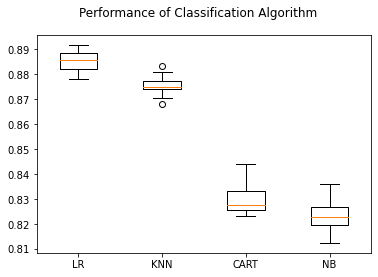

In [99]:
fig = plt.figure()

fig.suptitle('Performance of Classification Algorithm')

ax = fig.add_subplot(111)

plt.boxplot(results_c)

ax.set_xticklabels(names_c)

plt.show()

#### Logistic Regression is best performing model.

Among all algorithm, Logistic Regression achived an accuracy of about 88%, suggesting a high level of strength  of this model to classify the customer response given all defined customer features.

## Test LR model on test set

In [100]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

### Evaluate LR Model

In [101]:
prediction = LR.predict(X_test)

In [102]:
# Accuracy score 

print(accuracy_score(y_test, prediction))

0.8909291222915902


Accuracy is % of correct prediction out of all predictions made. LR model achives an accuracy of 89.09%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

In [103]:
# Confusion metrics 

from sklearn.metrics import confusion_matrix
import pylab as pl


In [104]:
print(confusion_matrix(y_test, prediction))

[[7278    0]
 [ 891    0]]


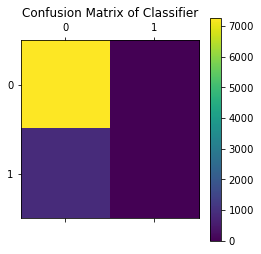

In [105]:
cm = confusion_matrix(y_test, prediction)
pl.matshow(cm)
pl.title('Confusion Matrix of Classifier')
pl.colorbar()
pl.show()

#### However, the result of accuracy can possibly yield misleading result if the dataset is imbalanced, because number of observations in different classes largely vary.

A confusion matrix gives a detailed breakdown of prediction result and error types.  Each cell in matrix represents a combination of instances of the predicted response and the actual response. In the test set, matrix proves that the algorithm performed well because most results (7277 true positive prediction) locate on diagonal cells which represents correct predictions. 891 tests (False negative) predicted the bank's client would subscribe to term deposit but they actually did not.

A problem revealed by this confusion matrix is that the dataset is shighly imbalanced, with nearly all clients actually decline to subscribe. This infers that the accuracy score is biased, and further evaluation should be carried out to determine accuracy of logistic regression model.

In [106]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7278
           1       0.00      0.00      0.00       891

    accuracy                           0.89      8169
   macro avg       0.45      0.50      0.47      8169
weighted avg       0.79      0.89      0.84      8169



Classification report shows the precision, recall, F1 score and support scores for LR classification model.

1. Precision of 0 (client said no) represents that for all instances predicted as no subscription, the % the percentage of clients which actually said no is 89%. Recall is the ability of a classifer to find all +ve instances. 
2. Recall of 0 indicates that for all clients that actually said no, the model predicts 100 correct that they will decine the offer.

In general report says that LR model has great predictive power to identify the customer who would not subscribe to term deposit. However, because of limited number of clients accepting the term deposit, there is need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

# Part 6. Machine Learning Regression

Regression analysis is carried out to complement classification result and help bank better predict campaign output.  

Since the duration of phone call is -vely correlated with the campaign output , it can serve as another indicator of possibility of subsciption. In this part, regression algorith will be used to estimate the duration of a phone call, helping bank better predict the subscription rate.



### Prepare data for regression



In [107]:
dataset4 = dataset2.drop('response_binary', axis=1)
dataset4

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,33,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,35,0,231,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,0,447,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40837,51,0,825,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40838,71,0,1729,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
40839,72,0,5715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [108]:
dataset4['duration'] = dataset['duration']

In [109]:
dataset4

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,duration
0,58,0,2143,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4.35
1,44,0,29,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2.52
2,33,0,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1.27
3,35,0,231,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2.32
4,28,0,447,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,0,505,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,6.43
40837,51,0,825,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,16.28
40838,71,0,1729,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,7.60
40839,72,0,5715,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,18.78


### 6.1 Feature Selection

The values of first 19 columns which contain customer statistics are selected as features while value of last column duration is selected as target.

In [110]:
array = dataset4.values

In [111]:
X = array[:,0:-1]
y = array[:,-1]

### 6.2 Train test split

In [112]:
test_size = 0.20
seed = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Compare regression algorithm

Six different regression algorithm (Linear regression, Lasso, Ridge, ElasticNet, K neighbours and Decision Tree) are run on dataset and best-performing one will be used to build regression model.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [114]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [115]:
results_e2 = []
names_e2 = []

for name, model in models:
    
    # define how to split off validation data
    
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    #train the model
    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
    results_e2.append(cv_results)
    
    names_e2.append(name)
    
    print(f'{name} : {np.mean(cv_results)} ({np.std(cv_results)})')

LR : -18.662793458507473 (1.7018933940944367)
Ridge : -18.662773363809386 (1.7018845149589734)
Lasso : -18.700153463811 (1.689394521684257)
EN : -18.699523221026293 (1.6895350053340261)
KNN : -22.049847813802995 (1.690225292605573)
CART : -37.27480125055048 (2.3965866856750933)


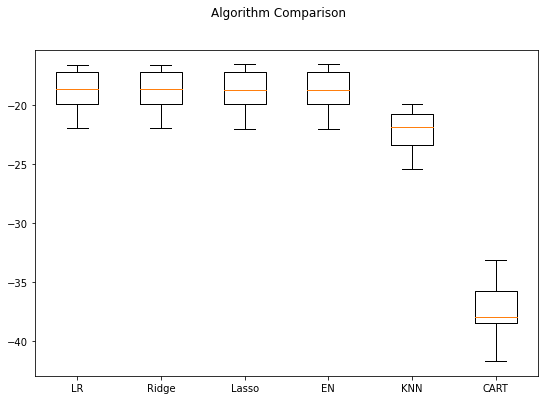

In [117]:
# plot results

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)

plt.boxplot(results_e2)

plt.suptitle('Algorithm Comparison')

ax.set_xticklabels(names_e2)

plt.show()

#### Ridge regression slighltly iutperforms other models

### Standardize data

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [119]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()), ('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

In [123]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
    
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    
    results_e2_normalized.append(cv_results)
    
    names_e2_normalized.append(name)
    
    print(f'{name} : {np.mean(cv_results)} ({np.std(cv_results)})')

ScaledLR : -18.663440462011565 (1.7004118492498934)
ScaledLasso : -18.721202804766513 (1.6869035265399592)
ScaledRIDGE : -18.662792739926033 (1.701892378576488)
ScaledEN : -18.721202804766513 (1.6869035265399592)
ScaledKNN : -22.167395637229795 (1.7458789790537288)
ScaledCART : -37.47685061085547 (2.507705434610134)


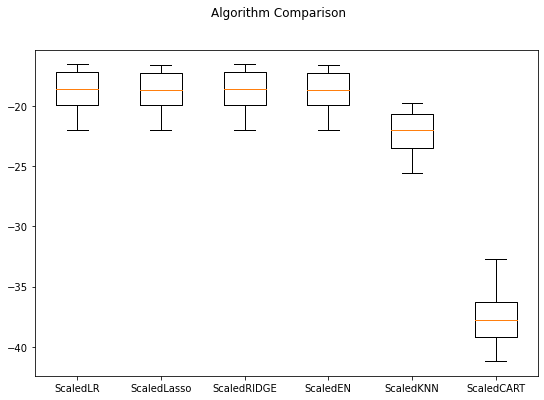

In [124]:
# plot results

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)

plt.boxplot(results_e2_normalized)

plt.suptitle('Algorithm Comparison')

ax.set_xticklabels(names_e2_normalized)

plt.show()

#### After standardization, ridge regression is still best performing model

### Ridge model on the test set

In [125]:
ridge = Ridge()

ridge.fit(X_train, y_train)

predicted_y = ridge.predict(X_test)

### Evaluate Ridge Model

In [126]:
from sklearn.metrics import mean_squared_error
print(f'MSE is : {mean_squared_error(y_test, predicted_y)}')

MSE is : 17.7797404329447


According to previous analysis, observations on duration are extremely varied from 0.1 to 81.97 minutes in dataset. Therefore, a 17.8 MSE testifies that ridge is a sound model in predicting target variable and suggest that the bank can roughly estimate the duration of campaign call of each client using their customer profile such as as age, job and loans.

# 7. Conclusion and recommendation

#### The main objective of this project is to increase effectiveness of bank telemarketting campaign, which was successfully met through data analysis, visualization and analytic model building. A target customer profile was established while classification and regression models were built to predict customer response to the term deposit campaign. 

## Conclusion:

According to previous analysis, a target customer profile can be established. The most responsive customer posses these faetures.

Feature 1: Age < 30 or Age > 60
Feature 2: Students or Retired People
Feature 3: A balance of more than 5000 Euros

By applying logistic and ridge regression algorithms, classification and estimation models were successfully built. with these two models, the bank will be able to predict a customer response to its telemarketing campaign before calling customer. In this way bank can allocate more marketting effort to the clients who are classified as highly likely to accept term deposit and call less to those who are unlikely to take term deposit.


In addition, predicting duration before calling and adjusting marketing plan benefits both bank and customer. On the other hand it will increase the efficiency of bank's telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from reciving undesirable advertisements, raising customer satisfaction. with the help of logistic and ridge regression models, the bank can enter a virtous cycle of effective marketing, more investment and happier customer.

## Recommendation

### 1. More appropriate timing

When implementing marketing strategy, external factors such as time of calling  should also be carefully considered. The previous analysis points out that March, September, October and December had a highest success rates. Nevertheless, more data should be collected and analysed to make sure this seasonal effect is constant over time. If trend has potental to continue in future, the bank should consider initiating its telemarketing in fall and spring.


### 2. Smarter Marketing Design:

By targeting right customers, the bank will have more and more postive responces, and the classification algorithms would ultimately eliminate imbalance in original dataset. Hence more accurate information will be presented to bank for improving subscription. Meanwhile, to increase likelyhood of subscription the bank should re-eveluate content and design of it's current campaign making it more appealing to its target customer.


### 3. Better service provision

With more granular understanding of its customer base, the bank has ability to provide better banking services. For example, marital status and occupation reveal a customer life stage while loan status says his/her risk profile. With this information bank can estimate when acustomer might need to make an investment. in this way bank can better satisfy it's customer demand by providing banking services for right customer at right time. 
